Les illustrations utilisées pendant le stream :

Le genre de truc qu'on cherche à obtenir:
![](thirdparty/Sirsys-p9.png)

Les équations qui définissent ça:
![Équations différentielles du modèle SIR](thirdparty/eqs.png)

L'évolution typique du COVID-19
![Évolution typique du COVID-19](thirdparty/9okpr1jwzeo41.jpg)

Les trois groupes du modèles SIR
![Trois groupes du modèle SIR](thirdparty/sadasda.png)



In [1]:
%matplotlib inline

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pylab import rcParams

rcParams['figure.figsize'] = 10, 10

In [13]:
t = np.arange(100)
S = np.zeros(100)
I = np.zeros(100)
R = np.zeros(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [210]:
def plot(series, labels, logscale=False):
    fig, ax = plt.subplots()
    
    #ax.plot(t, a, label = "S")
    for i in range(len(series)):
        t = np.arange(len(series[i]))
        ax.plot(t, series[i], label = labels[i])
    if logscale:
        ax.set_yscale('log')
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.axes.ticklabel_format(style='plain', useOffset=False, axis='both')    
    #yl = np.arange(100)
    #ax.set_yticklabels(yl, horizontalalignment='left')
    #ax.set_yticks(ypos)
    plt.xlabel('0=15 fev', fontsize=18)
    plt.legend()
    plt.figure()

In [89]:
def simu(max_days=60):
    S=list()
    I=list()
    R=list()
    currentR=initR
    currentS=initS
    currentI=initI
    for day in range(max_days):
        N = currentS+currentI+currentR
        dS = -beta*currentI*currentS/N
        dI = beta*currentI*currentS/N - gamma*currentI
        dR = gamma*currentI
        currentR += dR
        currentI += dI
        currentS += dS
        S.append(currentS)
        I.append(currentI)
        R.append(currentR)
    S = np.array(S)
    R = np.array(R)
    I = np.array(I)
    return S,I,R


In [151]:
initS=66.99e6
initI=12
# Source : https://www.worldometers.info/coronavirus/country/france/
# d=0  : 15 février 2020
initR=0
beta = 2.5
# Estimation foireuse
gamma = 0.1    
# Estimation foireuse

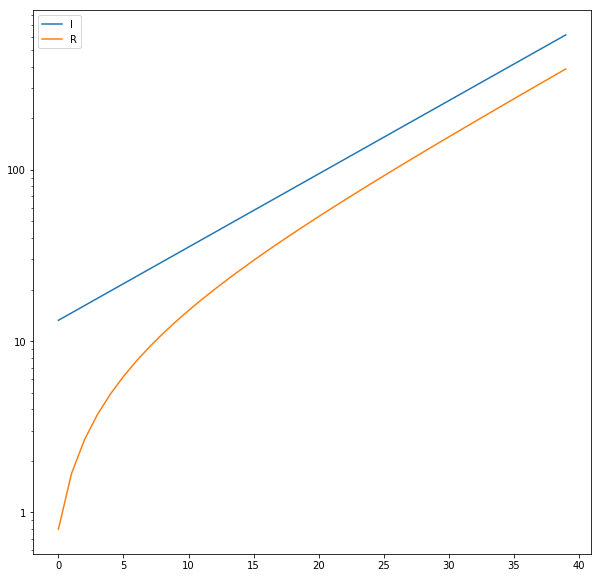

<Figure size 720x720 with 0 Axes>

In [143]:
# Pas trop mal, doublement en 7 jours

beta = 0.17
# Fitting a la mano sur donnée OMS: doublement tous les 6.4 jours
gamma = 0.066666
# Estimation: 15 jours de contagion => gamma ~= 1/15
serie2 = simu(40)
plot(*serie2, logscale=True)

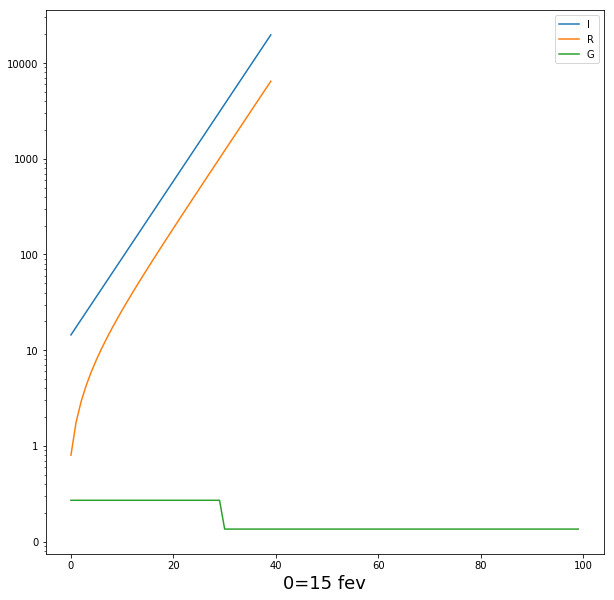

<Figure size 720x720 with 0 Axes>

In [211]:
# Pas trop mal, doublement en 7 jours

beta = 0.27
gamma = 0.066666
serie2 = simu(40)
plot(serie2[1:]+(G,), ["I","R", "G"], logscale=True)

In [173]:
B = np.ones(len(S))*0.27
B[30:]=0.135

In [175]:
B

array([0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 ,
       0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 ,
       0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 , 0.27 ,
       0.27 , 0.27 , 0.27 , 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135, 0.135,
       0.135])

In [176]:
def simu2(max_days=60):
    S=list()
    I=list()
    R=list()
    currentR=initR
    currentS=initS
    currentI=initI
    for day in range(max_days):
        N = currentS+currentI+currentR
        dS = -B[day]*currentI*currentS/N
        dI = B[day]*currentI*currentS/N - gamma*currentI
        dR = gamma*currentI
        currentR += dR
        currentI += dI
        currentS += dS
        S.append(currentS)
        I.append(currentI)
        R.append(currentR)
    S = np.array(S)
    R = np.array(R)
    I = np.array(I)
    return S,I,R

In [182]:
s1=simu()
s2=simu2()

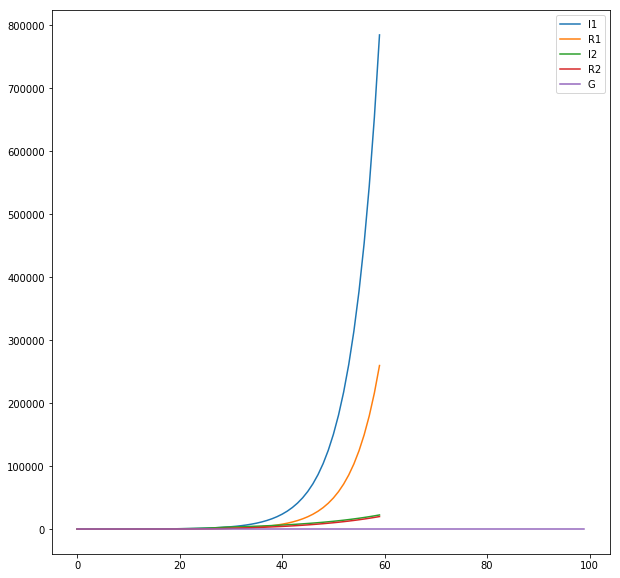

<Figure size 720x720 with 0 Axes>

In [184]:
plot(s1[1:]+s2[1:]+(G,), ["I1","R1", "I2" ,"R2","G"])

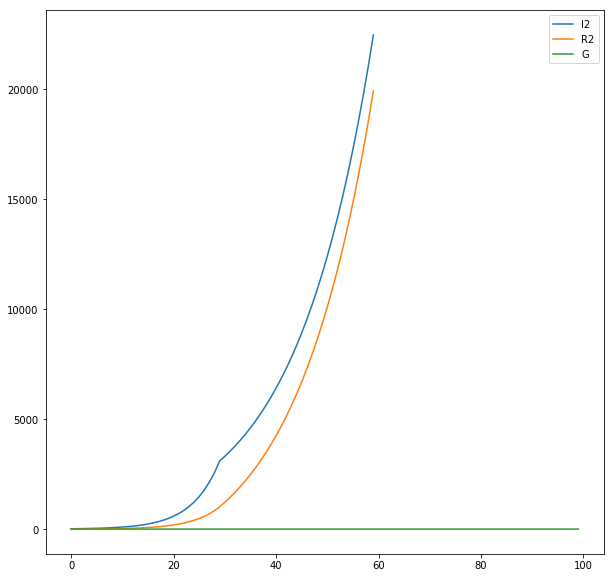

<Figure size 720x720 with 0 Axes>

In [185]:
plot(s2[1:]+(G,), ["I2" ,"R2","G"])

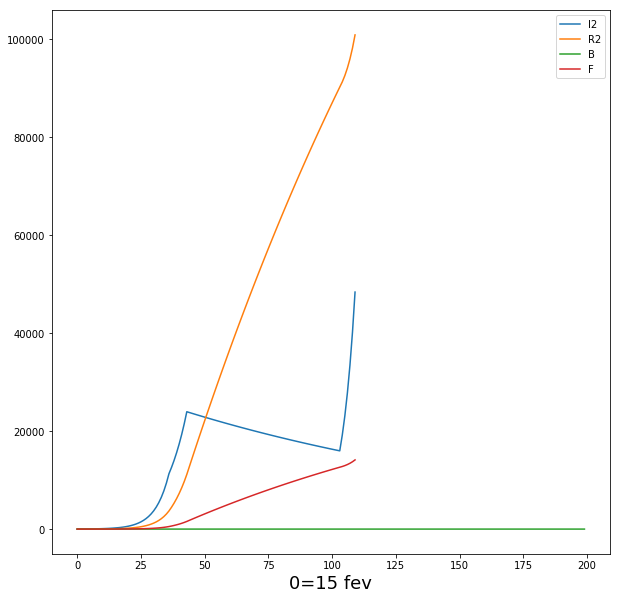

<Figure size 720x720 with 0 Axes>

In [223]:
B = np.ones(200)*0.27
B[37:]=0.18
B[44:]=0.06
B[104:]=0.27
s2=simu2(110)
F = s2[2]*0.14
plot(s2[1:]+(B,F,), ["I2" ,"R2","B", "F"], logscale=False)

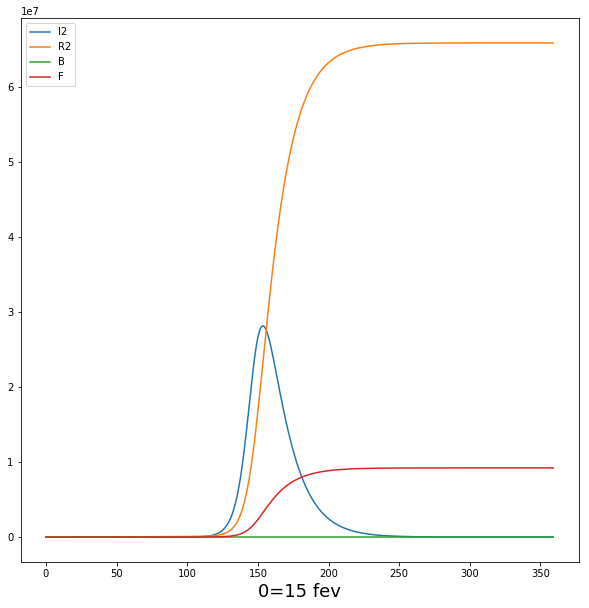

<Figure size 720x720 with 0 Axes>

In [225]:
B = np.ones(360)*0.27
B[37:]=0.18
B[44:]=0.06
B[104:]=0.27
s2=simu2(360)
F = s2[2]*0.14
plot(s2[1:]+(B,F,), ["I2" ,"R2","B", "F"], logscale=False)

In [226]:
F[-1]

9228573.688648509

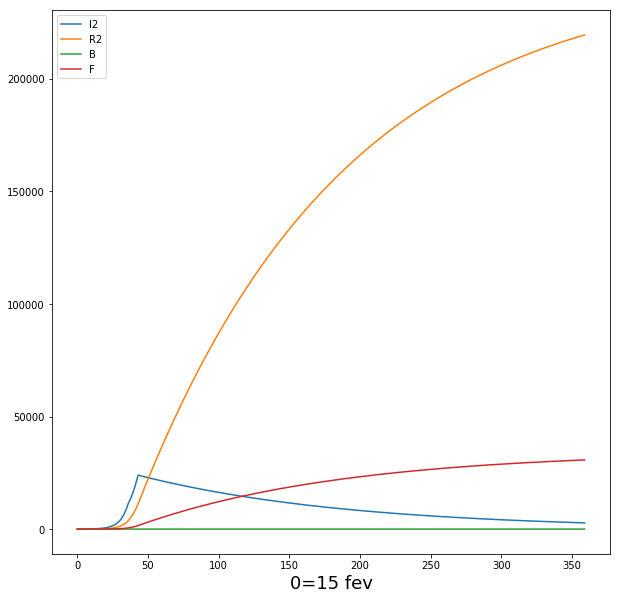

<Figure size 720x720 with 0 Axes>

In [227]:
B = np.ones(360)*0.27
B[37:]=0.18
B[44:]=0.06
s2=simu2(360)
F = s2[2]*0.14
plot(s2[1:]+(B,F,), ["I2" ,"R2","B", "F"], logscale=False)

In [228]:
F[-1]

30738.88785831099

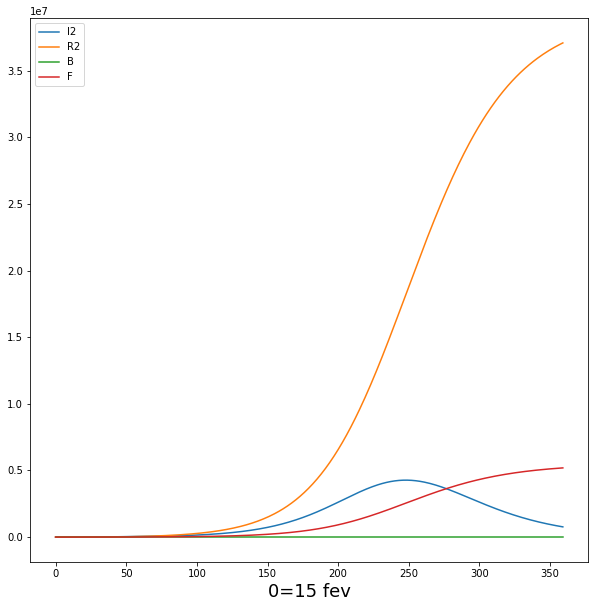

<Figure size 720x720 with 0 Axes>

In [232]:
B = np.ones(360)*0.27
B[37:]=0.18
B[44:]=0.1
s2=simu2(360)
F = s2[2]*0.14
plot(s2[1:]+(B,F,), ["I2" ,"R2","B", "F"], logscale=False)